# Python Imaging Library

Pillow is a Python imaging library that provides extensive capabilities for opening, manipulating, and saving image files in various formats, including JPEG, PNG, BMP, and GIF. It allows users to perform operations such as resizing, cropping, rotating, filtering, and enhancing images. Pillow is widely used in image processing, computer vision, and graphical applications, making it a crucial tool for developers working with images in Python.

Pillow originated as a fork of the Python Imaging Library (PIL), which was developed by Fredrik Lundh but became outdated and unsupported. To modernize and continue the development of PIL, Alex Clark and other contributors created Pillow in 2010. Since then, Pillow has been actively maintained, receiving updates, bug fixes, and support for newer Python versions, ensuring compatibility and improved performance for image processing tasks.

First, make sure your example image is in the right place. This should give the value `True`.

The most important class in the Python Imaging Library is the `Image` class, defined in the module with the same name. You can create instances of this class in several ways; either by loading images from files, processing other images, or creating images from scratch.

To load an image from a file, use the `open()` function in the `Image` module:

In [12]:
from PIL import Image

im = Image.open("/data/private/4. Geodata handling with Python - Week 4/GI-Duck.jpg")

Once we have loaded the image we can immediately show it using the `imshow()` method of matplotlib.

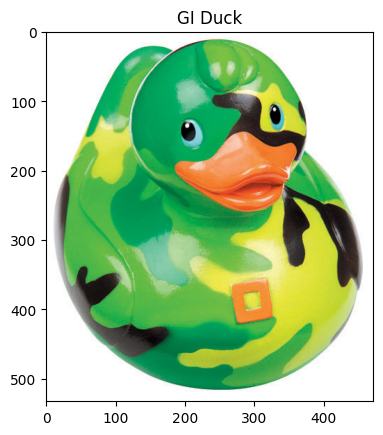

In [13]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.title("GI Duck");

## Image information

The following shows that the data comes from a 472 by 533 pixel JPEG image.

In [14]:
print(im.format)
print(im.size)

JPEG
(472, 533)


In [16]:
im.getbands()

('R', 'G', 'B')

## Histogram

In the following example we split the image into three bands and plot the histogram of the green band.

Because white dominates the image and has by far the highest count, we strip the last value from the histogram.

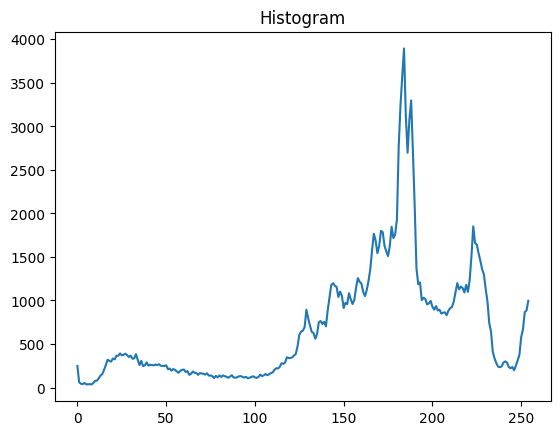

In [25]:
r, g, b = im.split()
plt.plot(g.histogram()[:-1])
plt.title('Histogram');

## RGB



Text(0.5, 1.0, 'Red')

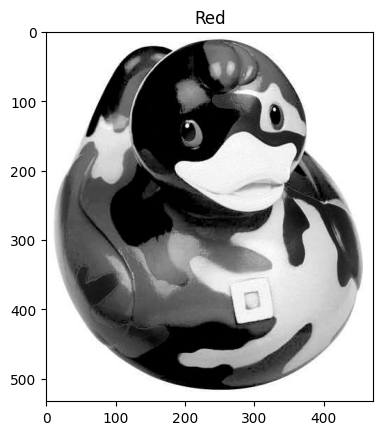

In [6]:
plt.imshow(r, cmap='grey')
plt.title('Red')

Text(0.5, 1.0, 'Green')

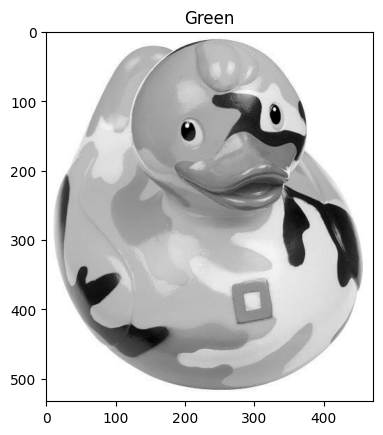

In [7]:
plt.imshow(g, cmap='grey')
plt.title('Green')

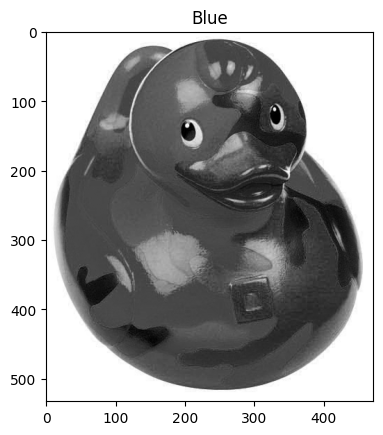

In [8]:
plt.imshow(b, cmap='grey')
plt.title('Blue');

## Mode conversion

Conversions to other modes can easily be made.

From RGB to B&W:

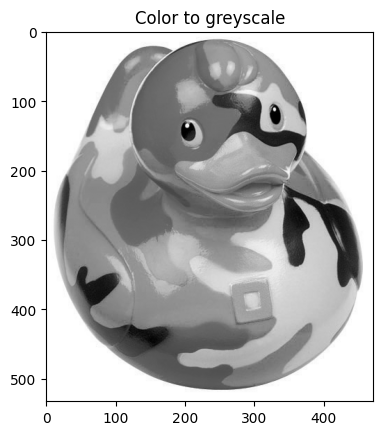

In [9]:
out = im.convert('L')
plt.imshow(out, cmap='gray')
plt.title("Color to greyscale");

And color to a black & white dithered image, in which the greylavels are approximated by patterns of dots of pure black and pure white.

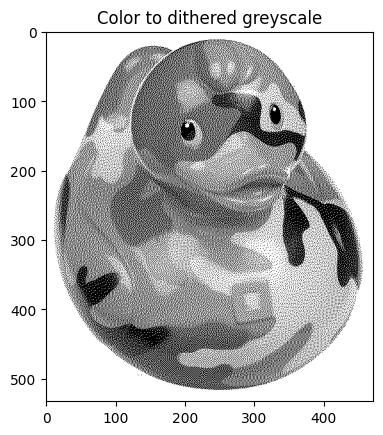

In [4]:
out = im.convert('1')
plt.imshow(out, cmap='gray')
plt.title("Color to dithered greyscale");

## Format conversion

Remember our GI duck image is a JPEG image? We can easily convert it to a different image format by specifying a specific file extension:

In [11]:
im.save('/content/drive/MyDrive/Colab Notebooks/gi-duck.png')

# Merging Bands

In a previous section, the three-band image was split into three separate bands. We can also construct a new image by merging three bands into an RGB-image. In the example below we swap the RGB bands and put green in red, red in green, and blue in blue. What was green in the original image will now be reddish, and what was red is now greenish.

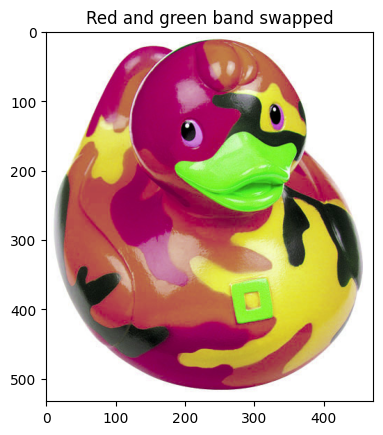

In [14]:
grb = Image.merge('RGB', (g, r, b))

plt.imshow(grb)
plt.title("Red and green band swapped");

## Point operations

The `point()` method can be used to translate all pixel values of an image (e.g. image contrast manipulation).
In most cases, a function object expecting one argument can be passed to the this method.
Each pixel is processed according to that function.

Python supports a syntax that lets you define one-line mini-functions on the fly.
Borrowed from Lisp, these so-called lambda functions can be used anywhere a function is required.

For instance, the following two functrion definitions are equivalent. However, `f()` is a named function, while the lambda defines an anonymous (nameless) function.

```python
def f(x):
  return x * x

lambda x: x * x
```

To generalize, a lambda function is a function that takes any number of arguments and returns the value of a single expression.
Lambda functions can not contain statements, and they can not contain more than one expression.

By splitting and merging we can also invert just one of the bands. The `point()` method is used to invert the pixel values. Pixel values range from 0 to 255. By subtracting the pixel value from 255, the values are inverted. Black becomes white, and white becomes black.

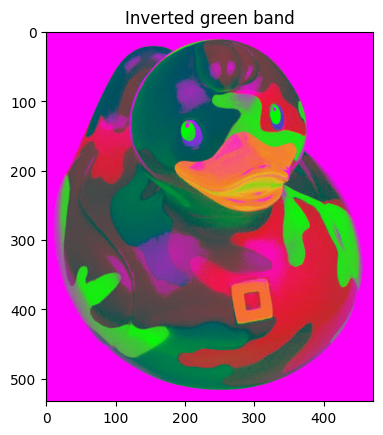

In [15]:
# slpit the image into r, g, and b
r, g, b = im.split()

# invert the green channel
neerg = g.point(lambda x: 255-x)

# merge the bands
out = Image.merge('RGB', (r, neerg, b))

plt.imshow(out)
plt.title("Inverted green band");

## Masking

If a mask is given, methods update only the regions indicated by the mask.  
- You can use either "1", "L" or "RGBA" images (in the latter case, the alpha band is used as mask).
- Where the mask is 255, the given image is copied as is.  
- Where the mask is 0, the current value is preserved.  
- Intermediate values can be used for transparency effects.

In the following example we create a mask from the red band. Where the red pixels are higher than 100 we set the mask value to 255, and to 0 otherwise. Again we use the `point()` method to do that.

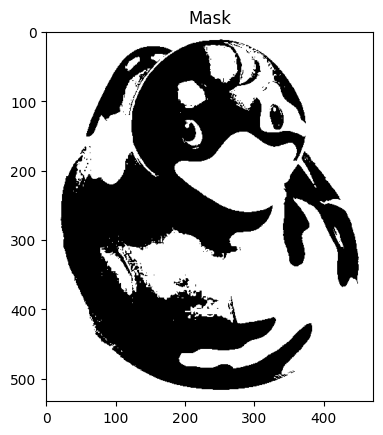

In [16]:
# split the image
r, g, b = im.split()

# create a mask from the red band
mask = r.point(lambda x: 255 if x > 100 else 0)

# sshow the mask
plt.imshow(mask, cmap='gray')
plt.title("Mask");

In the next step we will construct a new image and copy the pixel values of the original image, but only those pixels for which the red band has pixel values larger than 100.

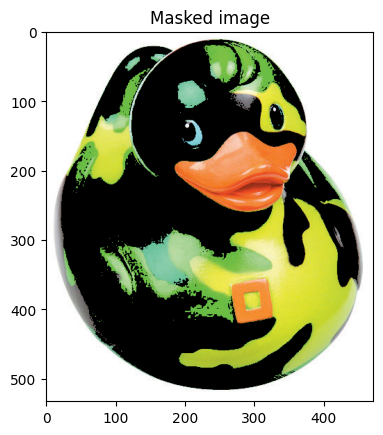

In [18]:
# create a new RGB image with the same size as the original image
immasked = Image.new('RGB', im.size)

# pasted the values from the original image to the new image, but only where the
# mask values are high
immasked.paste(im, mask=mask)

# show the result
plt.imshow(immasked)
plt.title("Masked image");

## Cropping

To extract a sub-rectangle from an image, use the crop method.

Example:

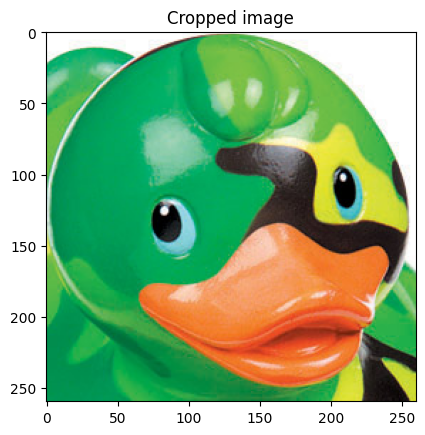

In [19]:
# create a bounding box as a 4-tuple
box = (120, 10, 380, 270)

# crop the image using a bounding box
subim = im.crop(box)

# show the result
plt.imshow(subim)
plt.title("Cropped image");

## Conclusion

Much more can be done using the Python Imaging Library, like resizing, flipping, rotating, interpolation, transformation, getting and putting pixel values with `getpixel()` and `putpixel()`, filtering, etc. However, we will leave it to the student to explore those possibilities.

In a next notebook we will move on to a Python module better suited for remote sensing images and spatial reference systems, called `rasterio`.